## Preprocessing Microspectrometry

In [1]:
# Load image
import cv2
print(cv2.__file__)
import numpy as np
from matplotlib import pyplot as plt


/home/user1/.local/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so


#### Upload Image

In [7]:
image_normal=cv2.imread('/home/user1/Documents/data_science_portfolio/image_processing/fund_ex.png')


### View Image --- No editing, contrast

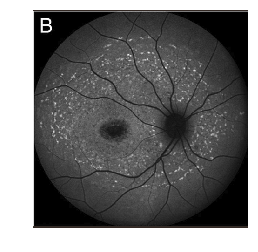

In [18]:
plt.imshow(image_normal), plt.axis("off")
plt.show()

### Enhance Contrast

In [9]:
image_yuv= cv2.cvtColor(image_normal, cv2.COLOR_BGR2YUV)
#if you read in using .imraad with a second parameter "0", theres no need to use cvtColor (it will break/error)
# second parameter '0'= greyscale

#### Enchance image

In [15]:
image_yuv[:,:,0]= cv2.equalizeHist(image_yuv[:,:,0])

#### Convert to RBG

In [16]:
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)


#### View Image

(<matplotlib.image.AxesImage at 0x7f5c8827a630>, (-0.5, 461.5, 467.5, -0.5))

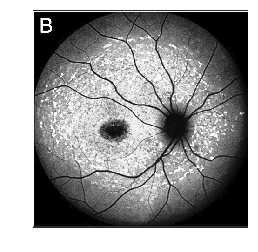

In [17]:
plt.imshow(image_rgb), plt.axis('off')

### Edge detection -- NORMAL

#### This works pretty well for this image.... 

42
83


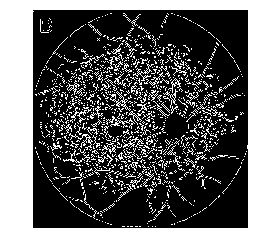

In [112]:
# Calculate median intensity
median_intensity= np.median(image_normal)



#Set threshold to be one standard deviation above and below median intensity
lower_threshold = int(max(0,(1.0-0.33) * median_intensity))

upper_threshold = int(min(255,(1.0+0.33)* median_intensity))

#Apply canny edge detector
print(lower_threshold)
print(upper_threshold)

image_canny2 = cv2.Canny(image_normal,40,120)
plt.imshow(image_canny2, cmap='gray'),plt.axis("off")
plt.show()

#best so far is ~40(-50), 120 (lower second value leads to more flecks but less macula)

### Edge Detection ---- Contrast

#### This does not work as well.... need to find better values

72
143


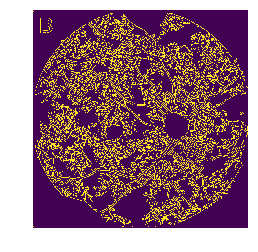

42 83


In [73]:
# Calculate median intensity
median_intensity= np.median(image_rgb)



#Set threshold to be one standard deviation above and below median intensity
lower_threshold = int(max(0,(1.0-0.33) * median_intensity))

upper_threshold = int(min(255,(1.0+0.33)* median_intensity))

#Apply canny edge detector
print(lower_threshold)
print(upper_threshold)

#for i in range(100):
   # for g in range(100):
image_canny2 = cv2.Canny(image_rgb,10,610)

c
print(i,g)

### Increase Contrast with PIL 

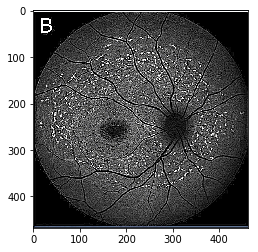

In [8]:
from PIL import Image, ImageFilter
im = Image.open('/home/user1/Documents/data_science_portfolio/image_processing/fund_ex.png')
im = im.filter(ImageFilter.EDGE_ENHANCE_MORE)


plt.imshow(im)
plt.show()

### K-Means Image Segmentation 

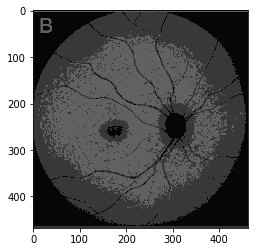

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



img = cv2.imread('/home/user1/Documents/data_science_portfolio/image_processing/fund_ex.png')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()

# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()